# 요즘 괌, 사이판 어때?

- 여행 트렌드는 어떻게 변했을까
- 괌과 사이판 여행 트렌드에는 어떤 변화가 있을까

In [76]:
import time
import urllib
import requests
import platform
import matplotlib.pyplot as plt

from matplotlib import image as mpimg
from pathlib import Path
from selenium import webdriver
from bs4 import BeautifulSoup
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from IPython import display


def mkWordCloud(text, png_name='result'):
	"""WordCloud 생성 함수
	Args
		text: str data for making WordCloud
		png_name = result image file name will be saved
	"""
	okt = Okt()  # Open Korean Text objective

	# 명사와 형용사만 noun_adj_list에 추가
	sentences_tag = []
	sentences_tag = okt.pos(text)
	noun_adj_list = []

	for word, tag in sentences_tag:
		if tag in ['Noun' , 'Adjective']:
			noun_adj_list.append(word)

	# 가장 많이 나온 단어 40개
	counts = Counter(noun_adj_list)
	tags = counts.most_common(40)

	# create WordCloud
	wc = WordCloud(font_path=path, width=800, height=600,\
				   background_color="white", max_font_size=50, random_state=30)
	cloud = wc.generate_from_frequencies(dict(tags))

	# save as a png file
	cloud.to_file(f'{png_name}.png')
	# display.Image(f'{png_name}.png')
	
	# display WordCloud
	plt.figure(figsize=(10, 8))
	plt.axis('off')
	# plt.imshow(cloud)


def naver_blog_text(start_date, end_date, keyword='', page_num=1):
	"""Naver Blog 검색 후 title과 descripiton text만 추출
	Args
		page_num: page number as int
		keyword: search keyword as str

	Return
		str
	"""
	kwrd_lst = keyword.split()
	keyword = urllib.parse.quote(keyword)

	driver = webdriver.Chrome(r'C:\Users\lh\Downloads\chromedriver_win32\chromedriver')  #change as your chromedriver path
	for n in range(1, page_num+1):
		driver.get(f'https://section.blog.naver.com/Search/Post.naver?pageNo={n}&rangeType=WEEK&orderBy=sim&startDate={start_date}&endDate={end_date}&keyword={keyword}')
		time.sleep(1)

		# all <div clas="desc"> contents
		page = driver.page_source
		bsobj = BeautifulSoup(page, 'html.parser')
		bsobj = bsobj.find_all('div', class_= 'desc')

		# text except search keyword
		text = []
		for bs in bsobj:
			txt = bs.text
			txt = txt.replace('\n', '')
			for k in kwrd_lst:
				txt = txt.replace(k, '')
			text.append(txt)
	return ''.join(text)


def parallel_imgs(img1, img2, img1_title='', img2_title=''):
	"""Show two images in one line"""
	fig = plt.figure(figsize=(50, 50))

	# image1
	a = fig.add_subplot(1, 2, 1)
	a_img = mpimg.imread(img1)
	# lum_img = img[:,:,0]
	imgplot = plt.imshow(a_img)
	a.set_title(img1_title, fontsize=40)
	# plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

	# image2
	b = fig.add_subplot(1, 2, 2)
	b_img = mpimg.imread(img2)
	imgplot = plt.imshow(b_img)
	b.set_title(img2_title, fontsize=40)

	# plt.savefig('two_imgs_oneline.png')
	plt.show()


# hangeul font path
if platform.system() == 'Windows':
	path = r'c:\Windows\Fonts\malgun.ttf'
elif platform.system() == 'Darwin':
	path = r'/System/Library/Fonts/AppleGothic'
else:
	path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

In [ ]:
# Daume 통합웹 탭에서 '괌 사이판 여행' 검색 결과

# url에 있는 한글 encoding
search_keyword = '괌 사이판 여행'
keyword_list = search_keyword.split()
keyword = ''

for k in keyword_list:
	keyword = keyword + urllib.parse.quote(k) + '+'
keyword = keyword.rstrip('+')

# scraping
bs = []
for n in range(1, 32):
	req = requests.get(f'https://search.daum.net/search?p={n}&q={keyword}&w=fusion&DA=PGD&period=6m&sd=20220126215757&ed=20220726215757')
	time.sleep(1)
	bsobj = BeautifulSoup(req.text, 'html.parser')

	# Daum 통합웹 탭에서 해당 키워드 검색 데이터
	bsobj = bsobj.find('ul', class_='list_info ty_doc')  
	bs.append(bsobj)

# html data에서 괌, 사이판, 여행, 블로그, 카페, 웹문서 단어 제외
text = ''
for page in bs:
	page = page.text
	for k in keyword_list:
		text += page.replace(k, '')
text = text.replace('블로그', '').replace('카페', '').replace('웹문서', '')

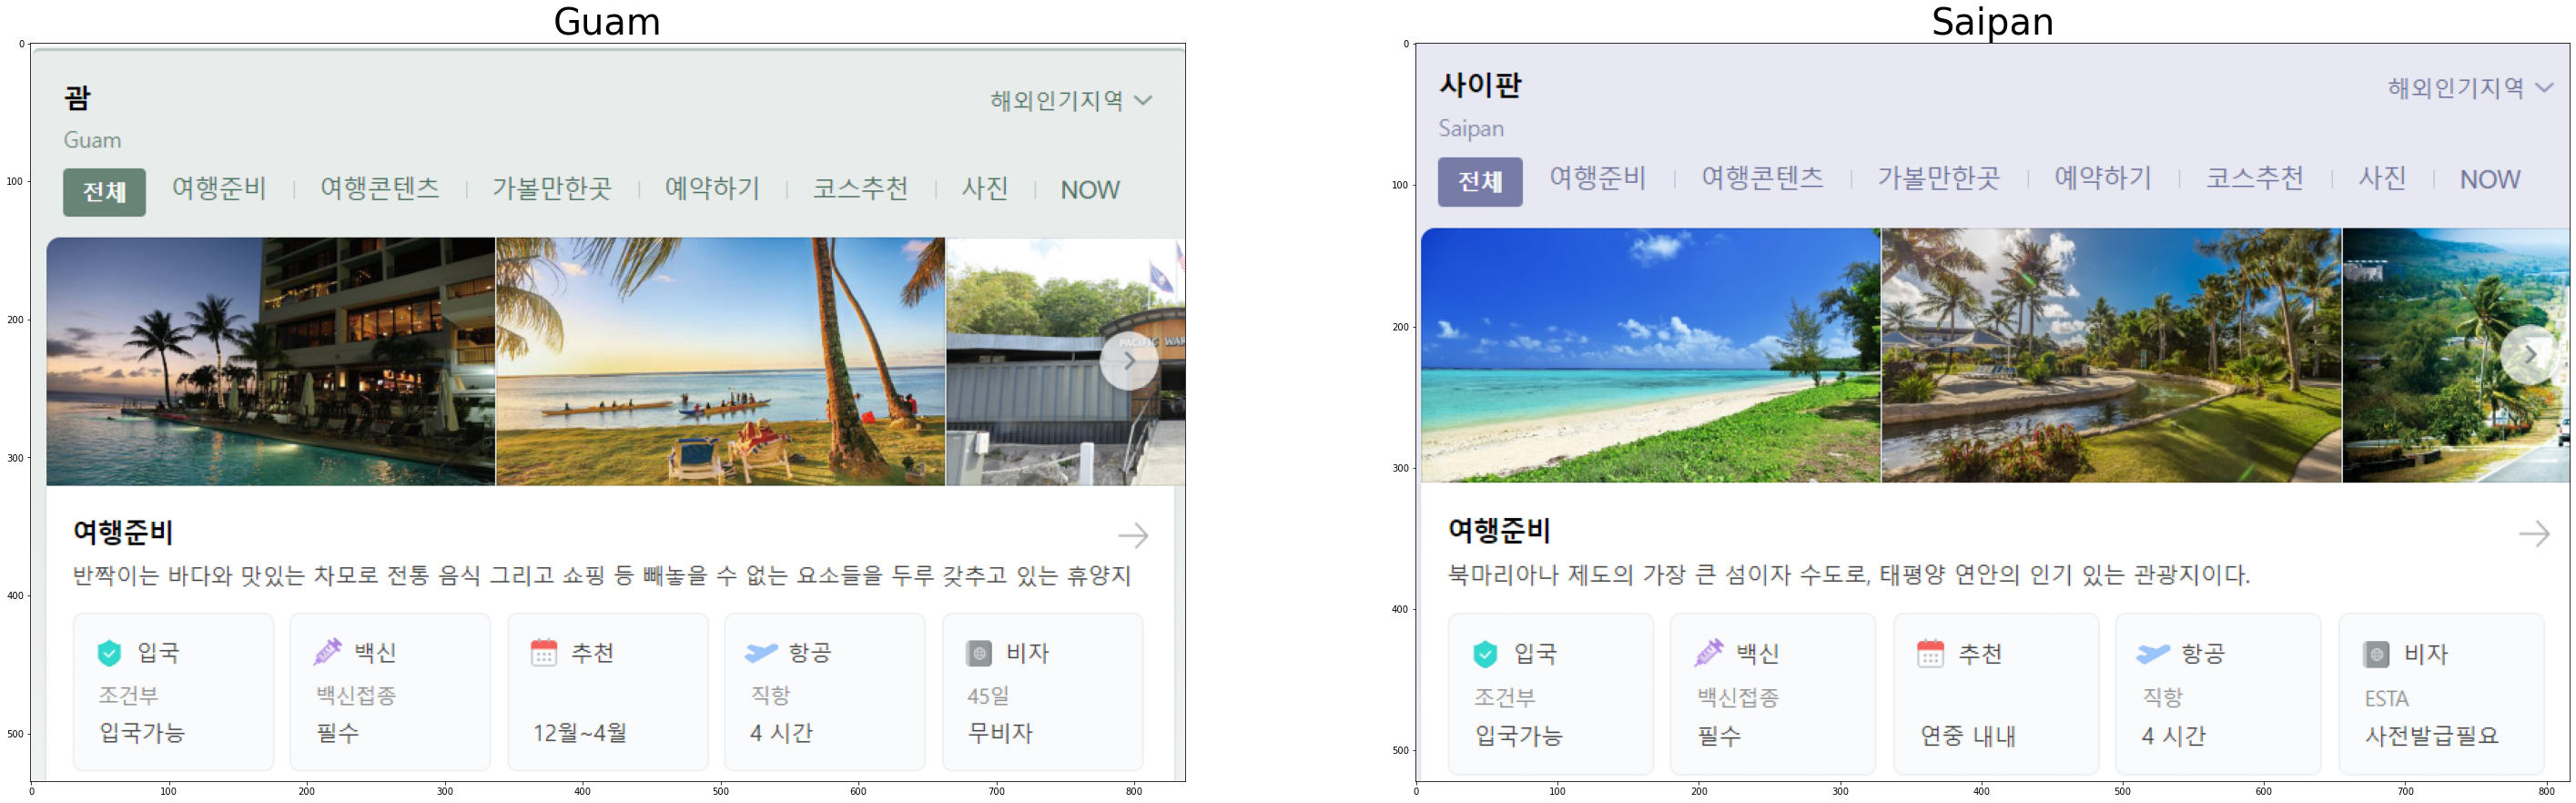

In [58]:
parallel_imgs('./img/guam_info.png', './img/saipan_info.png', 'Guam', 'Saipan')

---
## **네이버 블로그에 좀 더 다양한 범위의 키워드 포함**

- 다음 웹통합 탭에서 '괌 사이판 여행' 검색 결과 빈출 키워드

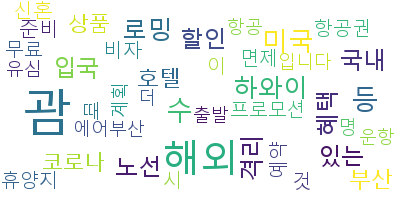

In [18]:
display.Image('./img/guam_saipan.png')

- 올해 상반기 네이버 블로그에서 '괌 여행', '사이판 여행' 검색 결과 빈출 키워드

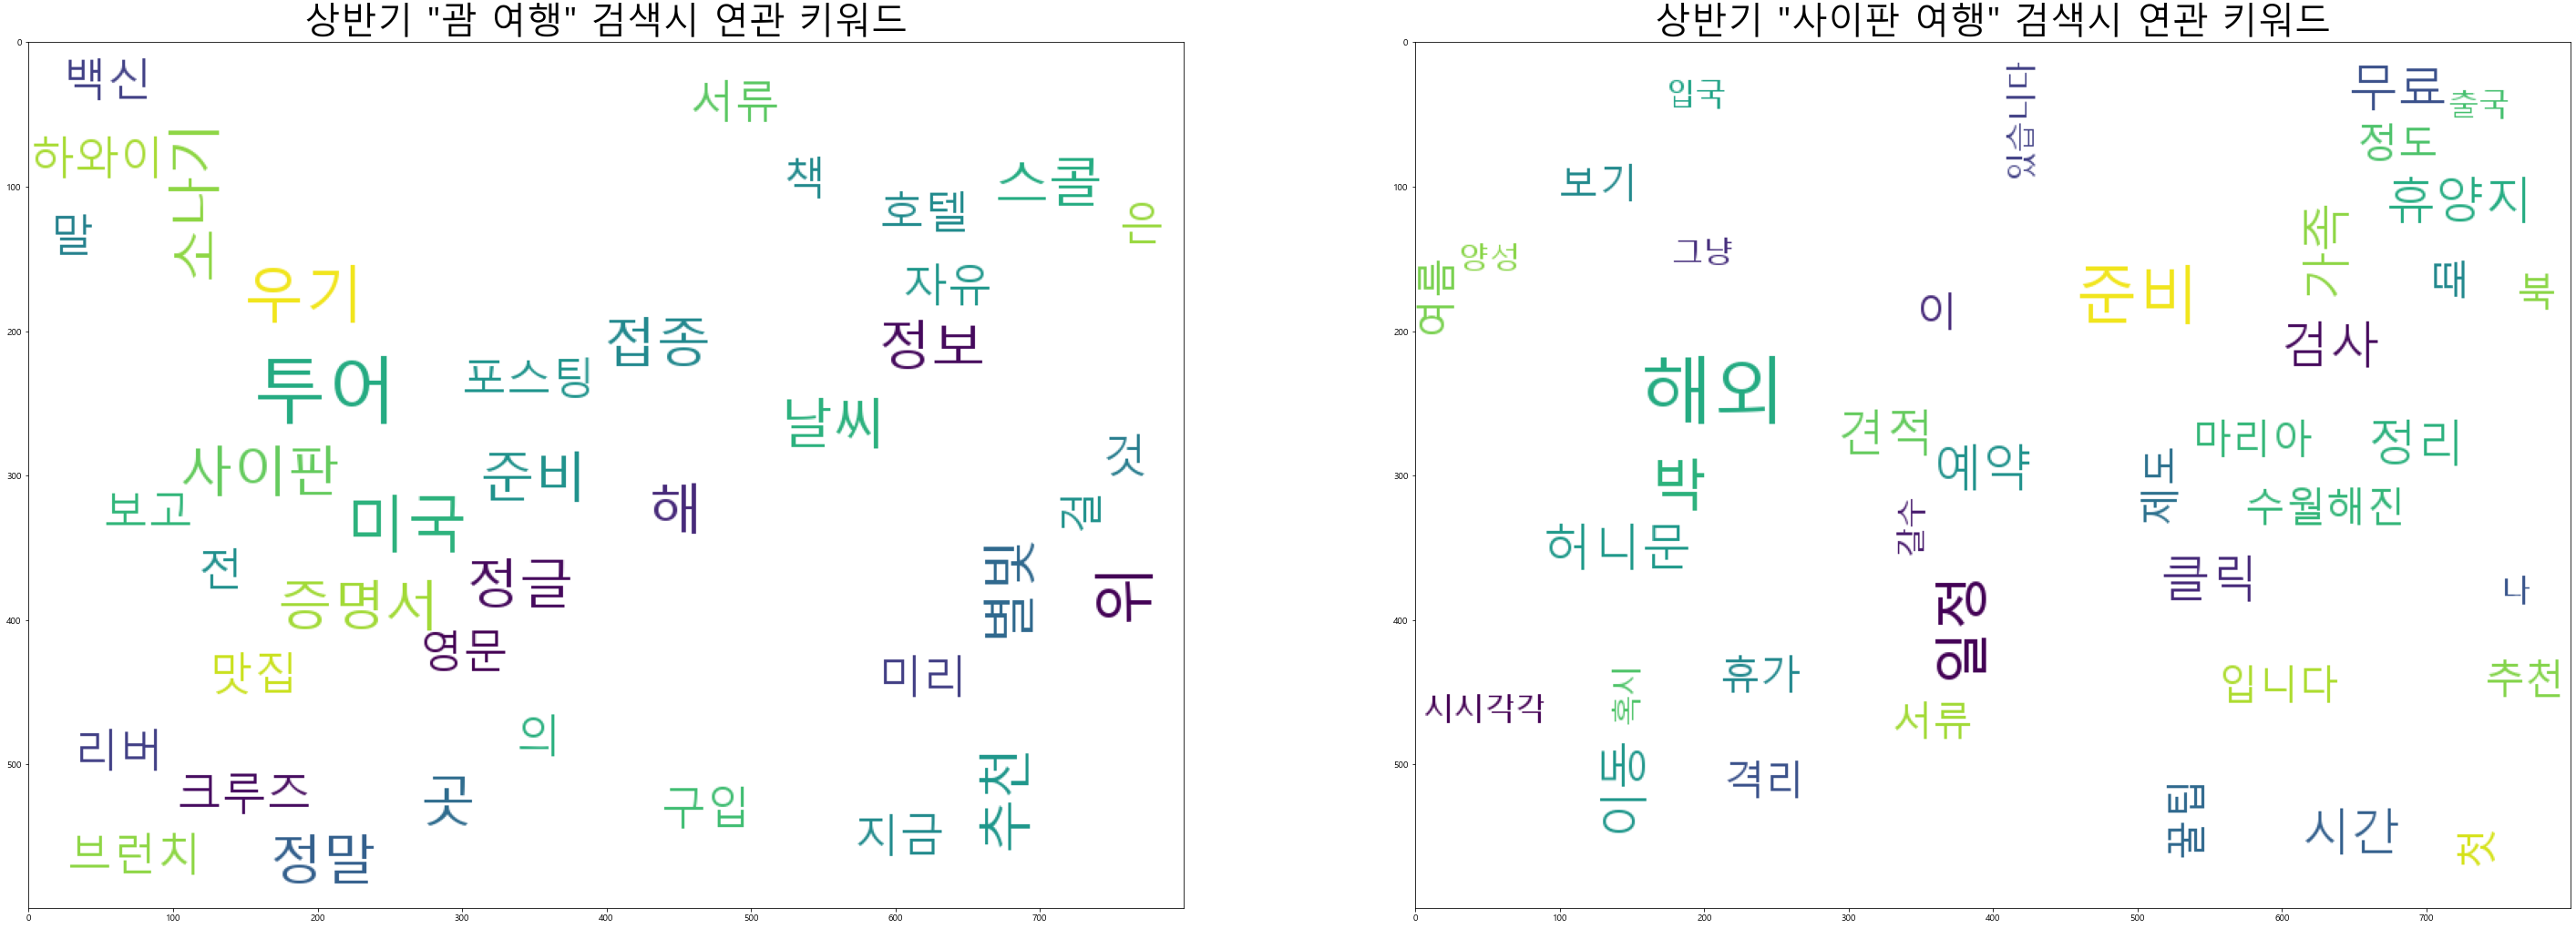

In [77]:
guam_txt = naver_blog_text('2022-01-26', '2022-07-26', '괌 여행', 10)
mkWordCloud(guam_txt, 'guam_trip')
parallel_imgs('./img/guam_trip.png', './img/saipan_trip.png', '상반기 "괌 여행" 검색시 연관 키워드', '상반기 "사이판 여행" 검색시 연관 키워드')

- 작년 하반기 네이버 블로그에서 '괌 여행' 검색 결과 빈출 키워드

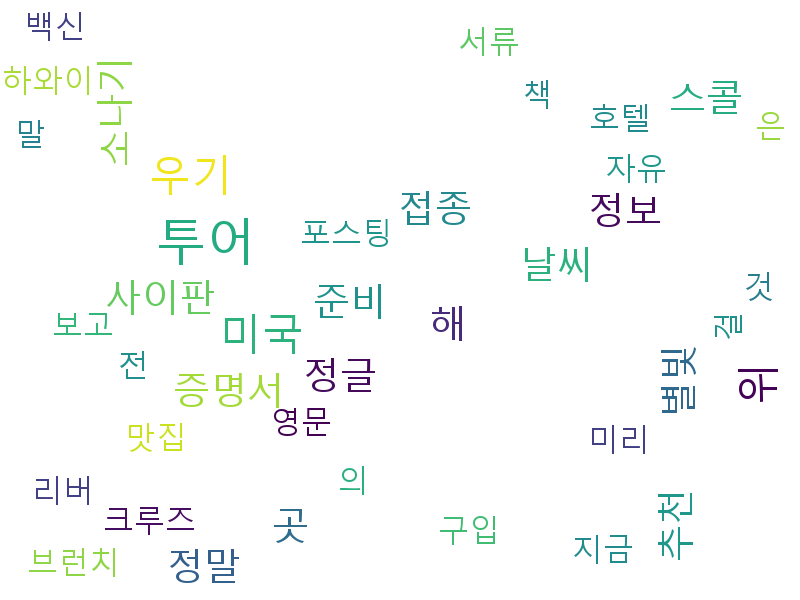

In [79]:
guam_txt = naver_blog_text('2021-07-01', '2022-12-31', '괌 여행', 10)
mkWordCloud(guam_txt, 'guam_trip')
display.Image('./img/guam_trip.png')

---
## **코로나 완화, 항공권 특수로 인해 <span style='background: yellow'>부산</span>ㅡ> 괌, 사이판 노선 및 <span style='background: yellow'>'휴양지'</span> 검색에 영향**

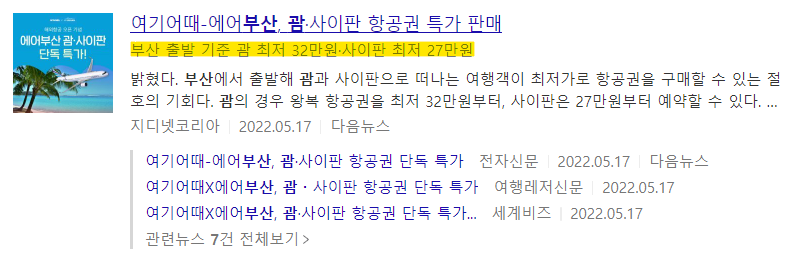

In [16]:
display.Image('./img/guam_saipan_ticket.png')

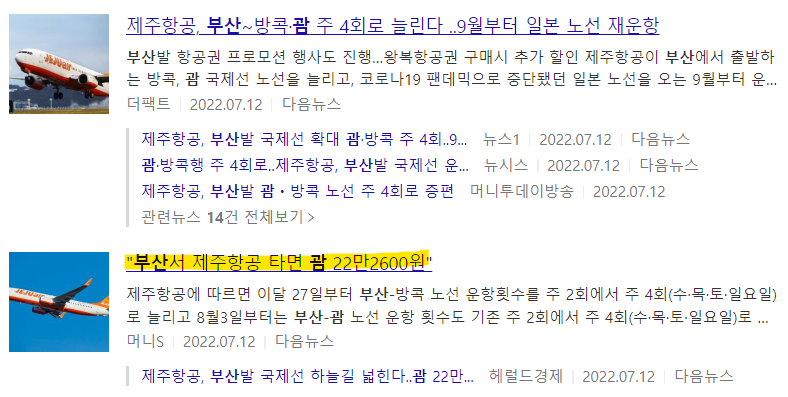

In [17]:
display.Image('./img/guam_saipan_ticket2.png')

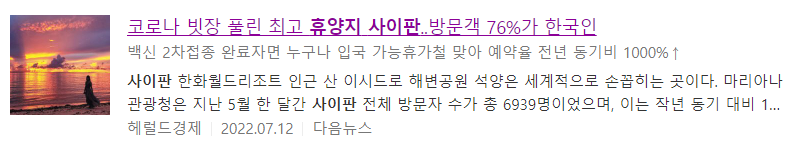

In [19]:
display.Image('./img/guam_saipan_article.png')

---
## **사람들의 니즈(Needs)는 <span style='color: blue'>호캉스, 휴양지, 힐링</span>에 중점**

- 여행사 키워드가 없어서 단체 여행 상품보다 개인적으로 준비하는 여행 방식 보편화
- 상품 판매에서 나아가 플랫폼 형태로 진화를 모색하기

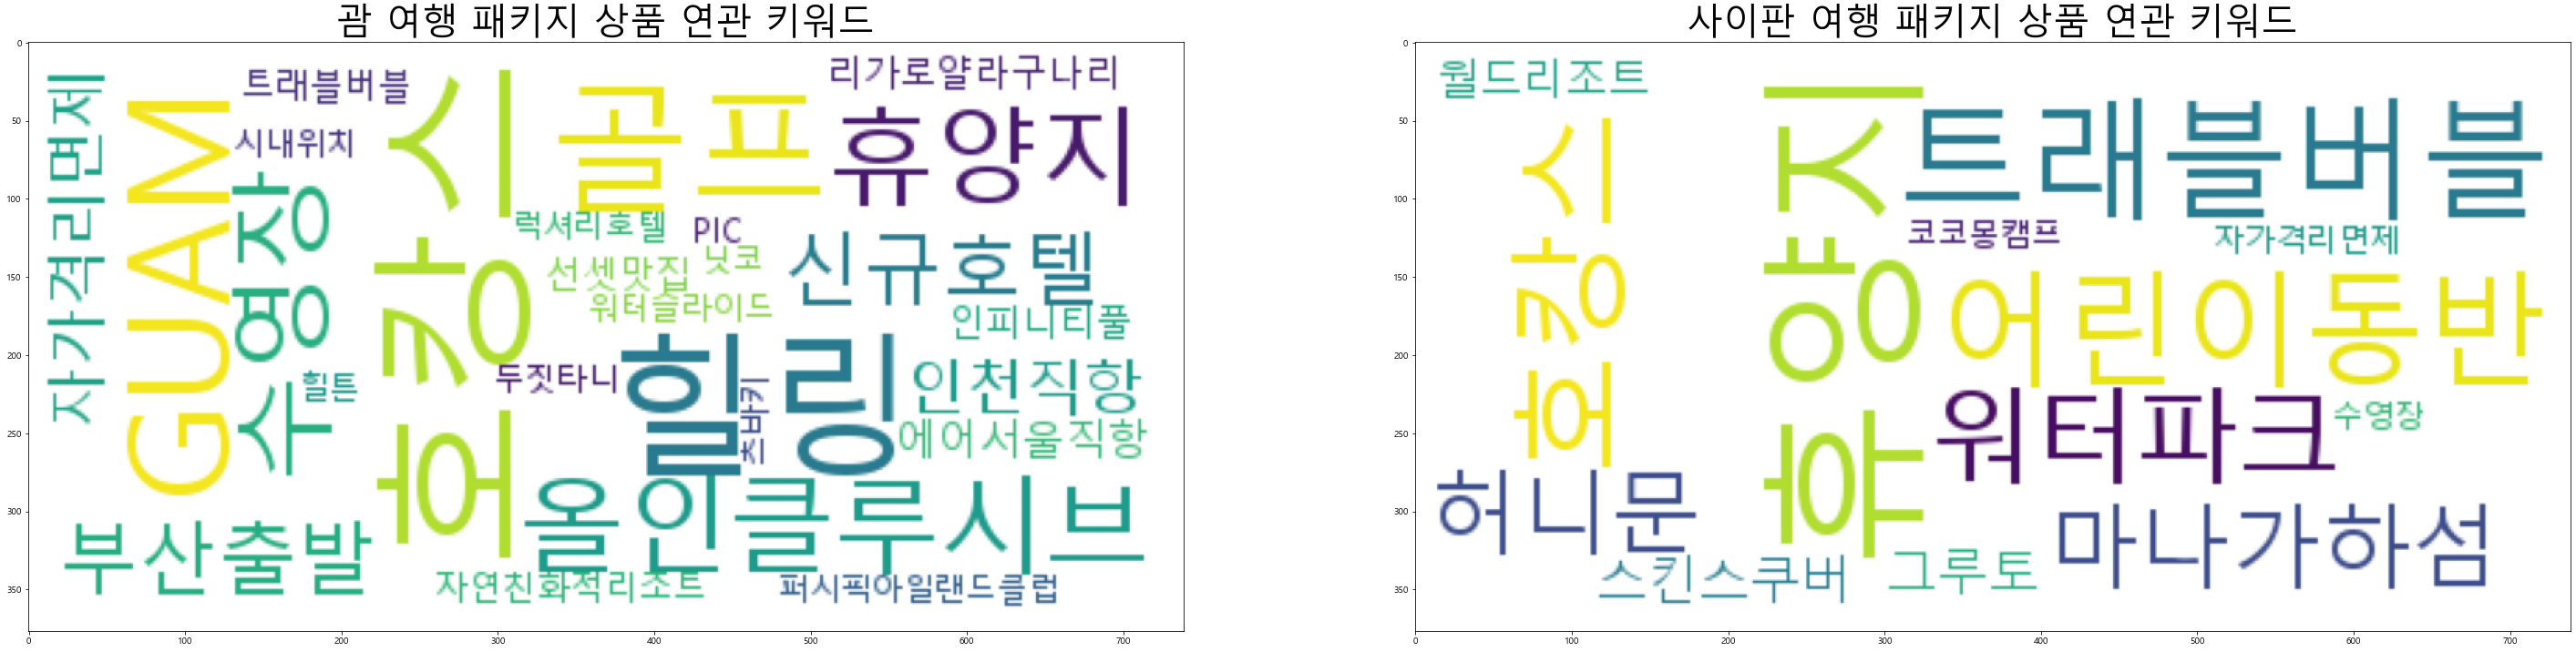

In [80]:
parallel_imgs('./img/guam_pkg.png', './img/saipan_pkg.png', '괌 여행 패키지 상품 연관 키워드', '사이판 여행 패키지 상품 연관 키워드')

---
## Link Reference

- https://travel.naver.com
- https://section.blog.naver.com
- https://search.daum.net